In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:


# Try reading the CSV file with a different encoding
try:
    data = pd.read_csv('car_accident.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('car_accident.csv', encoding='ISO-8859-1')  # or 'utf-16' depending on the actual encoding
data

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


['2-Car', '1-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Bus', 'Moped/Motorcycle', nan]
[37606, 10245, 3152, 609, 468, 850, 1007, 6]


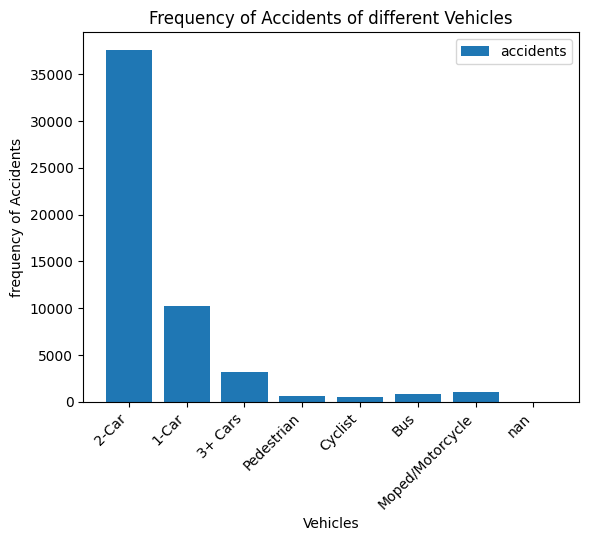

In [5]:
# CALCULATING FREQUENCY OF ACCIDENTS DUE TO EACH CATEGORY OF VEHICLES

from collections import Counter
collision_column =data['Collision Type']
collision_list = collision_column.tolist()

# counter-counts for the occurance of each item in the list and creates a dictionary containing item as kay and its occurance as value
frequency = Counter(collision_list)

Vehicles = []
Count = []

for vehicle, count in frequency.items():
   Vehicles.append(vehicle)
   Count.append(count)

print(Vehicles)
print(Count)


plt.bar( np.arange(len(Vehicles)),Count, label = 'accidents' )
plt.title('Frequency of Accidents of different Vehicles')
plt.ylabel('frequency of Accidents')
plt.xlabel('Vehicles')
plt.xticks(np.arange(len(Vehicles)), Vehicles ,  rotation=45, ha="right") 
plt.legend()
plt.show()


Text(0, 0.5, 'frequency of accidents')

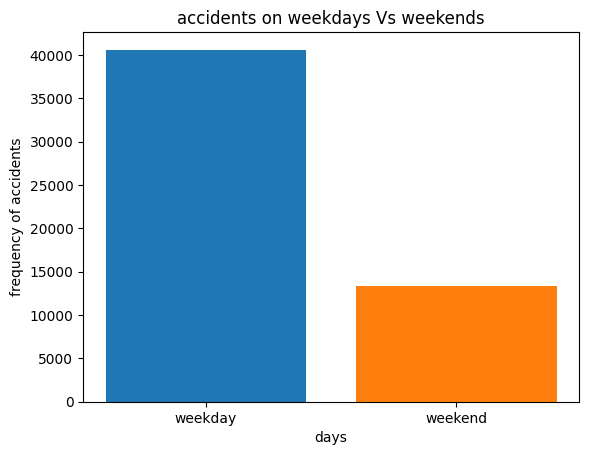

In [6]:
# PLOTTING ACCIDENTS ON WEEKDAYS Vs WEEKENDS

days = data['Weekend?']
weekday = 0
weekend = 0

for day in days:
    if day == 'Weekday':
        weekday += 1
    else:
        weekend += 1
plt.bar('weekday', weekday, label = 'accidents on weekdays')
plt.bar('weekend', weekend , label = 'accidents on weekends')
plt.title('accidents on weekdays Vs weekends')
plt.xlabel('days')
plt.ylabel('frequency of accidents')

[277.6464045381236, 74.31844724987486, 7.267671430954897, 0.7674767810466604]


([<matplotlib.patches.Wedge at 0x266eb8158e0>,
 [Text(-0.9032178635986001, 0.7900617006768399, '277.6464045381236'),
  Text(0.8456446124189704, -0.8514018965722178, '74.31844724987486'),
  Text(1.1964611863562467, -0.09209033360240967, '7.267671430954897'),
  Text(1.199973085584682, -0.008037031316197641, '0.7674767810466604')])

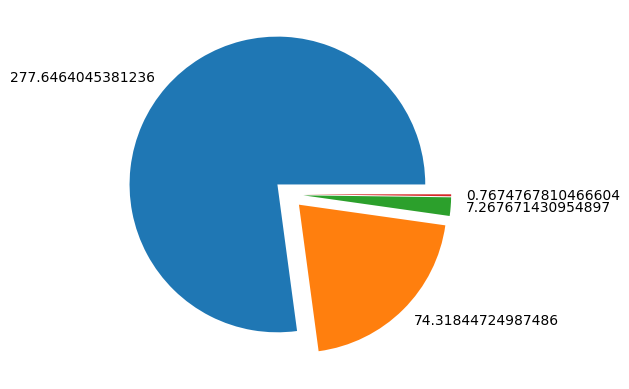

In [7]:
# PIE CHART FOR REPRESENTING TYPES OF INJURIES OBSERVED DURING THE ACCIDENTS
from collections import Counter
injury = data['Injury Type']
injury_list = injury.to_list()

count = Counter(injury_list)

injurys = []
frequency = []

for i, f in count.items():
    injurys.append(i)
    frequency.append(f)
total_frequency = sum(frequency)

percentage = []
for x in frequency:
    P = (x/total_frequency)* 360
    percentage.append(P)

explode = [0.1,0.1, 0.1,0.1]
print(percentage)
plt.pie(percentage, labels = percentage ,explode=explode)
   
# injury_count = injury_list.count()

([<matplotlib.axis.YTick at 0x266eb927f80>,
 [Text(0, 0, 'OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR'),
  Text(0, 1, 'OTHER (VEHICLE) - EXPLAIN IN NARRATIVE'),
  Text(0, 2, 'IMPROPER PASSING'),
  Text(0, 3, 'OVERCORRECTING/OVERSTEERING'),
  Text(0, 4, 'UNSAFE LANE MOVEMENT'),
  Text(0, 5, 'ALCOHOLIC BEVERAGES'),
  Text(0, 6, 'IMPROPER LANE USAGE'),
  Text(0, 7, 'LEFT OF CENTER'),
  Text(0, 8, 'ROADWAY SURFACE CONDITION'),
  Text(0, 9, 'UNSAFE SPEED'),
  Text(0, 10, 'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE'),
  Text(0, 11, 'ANIMAL/OBJECT IN ROADWAY'),
  Text(0, 12, 'IMPROPER TURNING'),
  Text(0, 13, 'SPEED TOO FAST FOR WEATHER CONDITIONS'),
  Text(0, 14, 'DISREGARD SIGNAL/REG SIGN'),
  Text(0, 15, 'RAN OFF ROAD RIGHT'),
  Text(0, 16, 'UNSAFE BACKING'),
  Text(0, 17, 'OTHER (DRIVER) - EXPLAIN IN NARRATIVE'),
  Text(0, 18, 'FOLLOWING TOO CLOSELY'),
  Text(0, 19, 'FAILURE TO YIELD RIGHT OF WAY')])

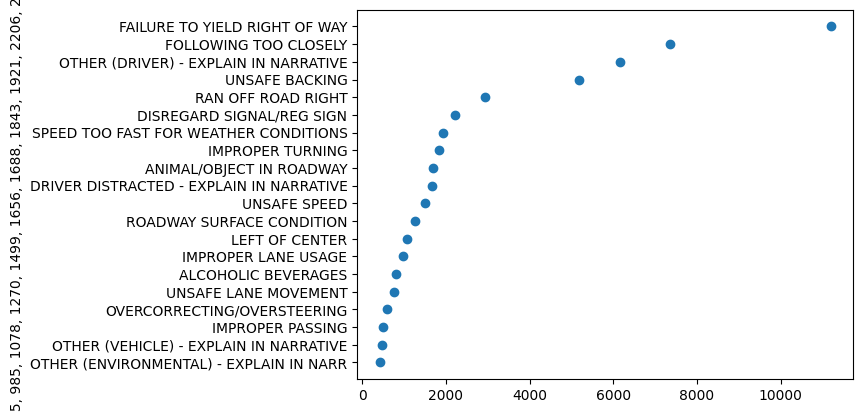

In [8]:
# PLOTTING MOST COMMON REASONS FOR ACCIDENTS

factor_column = data['Primary Factor']
common_factor = factor_column.value_counts().head(20)

Factors =[]
Counts = []
for factor, count in common_factor.items():
   Factors.append(factor)
   Counts.append(count)

Counts.reverse()
Factors.reverse()
plt.scatter(Counts,Factors)
plt.xlabel("")
plt.ylabel(Counts)
plt.yticks(np.arange(len(Counts)),Factors, ha="right")

# print(common_factor)
# plt.scatter( common_factor , Counts)
# plt.xlabel("hii")
# plt.ylabel(Factors )
# plt.yticks(np.arange(len(Factors)), Factors, rotation=45, ha="right")
# plt.show()


In [9]:
# PLOTTING LOCATIONS ACCORDING TO FREQUENCY OF ACCIDENTS
import pandas as pd
from matplotlib import pyplot as plt
try:
    data = pd.read_csv('car_accident.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('car_accident.csv', encoding='ISO-8859-1')  # or 'utf-16' depending on the actual encoding


location_column = data['Reported_Location']
location_count = location_column.value_counts()

locations = []
counts = []
for location, count in location_count.items():
    locations.append(location)
    counts.append(count)

location_series = pd.Series(locations).head(20)
count_series = pd.Series(counts).head()



plt.barh(counts,locations)
plt.show()


<BarContainer object of 19364 artists>

Error in callback <function _draw_all_if_interactive at 0x00000266EB488E00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 